# Chapter 6 Linked Structures
* **Disadvantages in the use of array and Python list.**
    * **First, insertion and deletion operations typically require items to be shifted to make room or close a gap.**
    * **Second, the size of an array is fixed and cannot change. The expansion of an array comes with a cost. Since the elements of a Python list are stored in an array, an expansion requires the creation of a new larger array into which the elements of the original array have to copied.**
    * **Finally, the elements of an array are stored in contiguos bytes of memory, no matter the size of the array. Each time an array is created, the program must find and allocate a block of memory large ennough to store the entire array.**

## 6.1 Introduction
* **A *linked structure* contains a collection of objects called *nodes*, each of which contains data abd at least one reference or *link* to another node.**
    * **A *linked list* is a linked structure in which the nodes are connected in sequence to form a linear list.**
    * **The last node in the list, commonly called the *tail node*, is indicated by a null link reference.**
    * **The first node in the list must be named or referenced by an external variables as it provides an entry point into the linked list. This variable is commonly known as the *head pointer*, or *head reference*.**
    * **A linked list can also be empty, which is indivated when the head reference is null.**
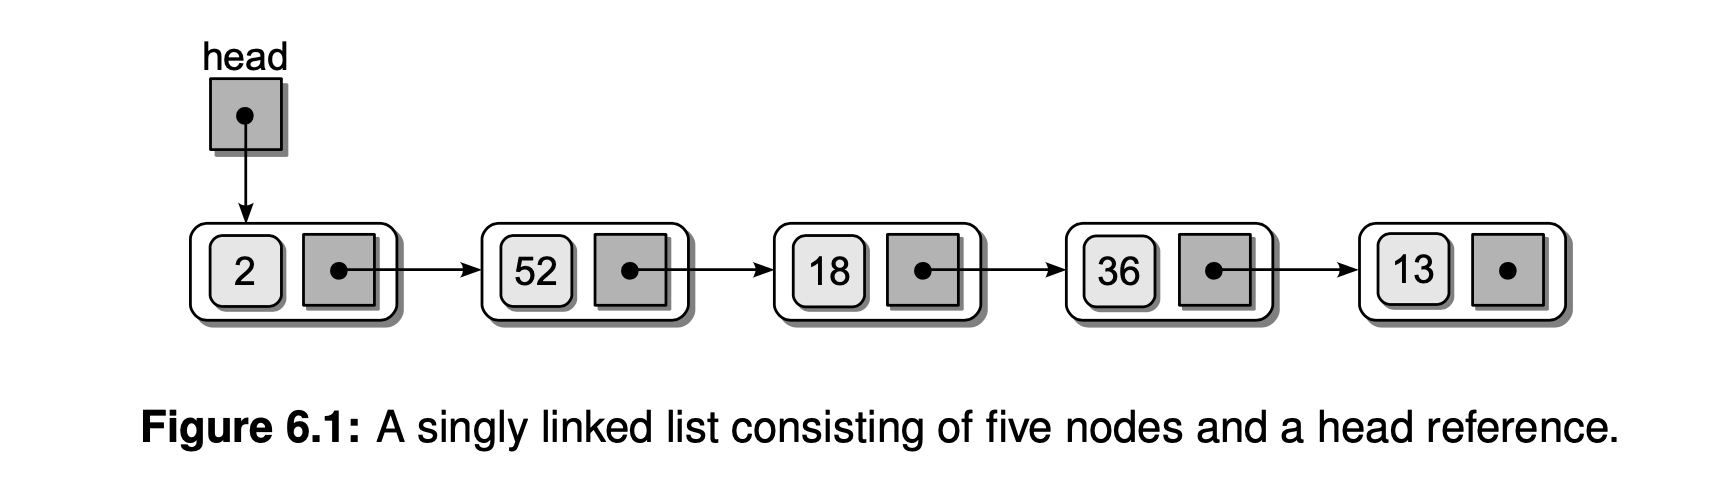
* **If more links are added to each node, we can connect the nodes to form any type of configuration we may need.**
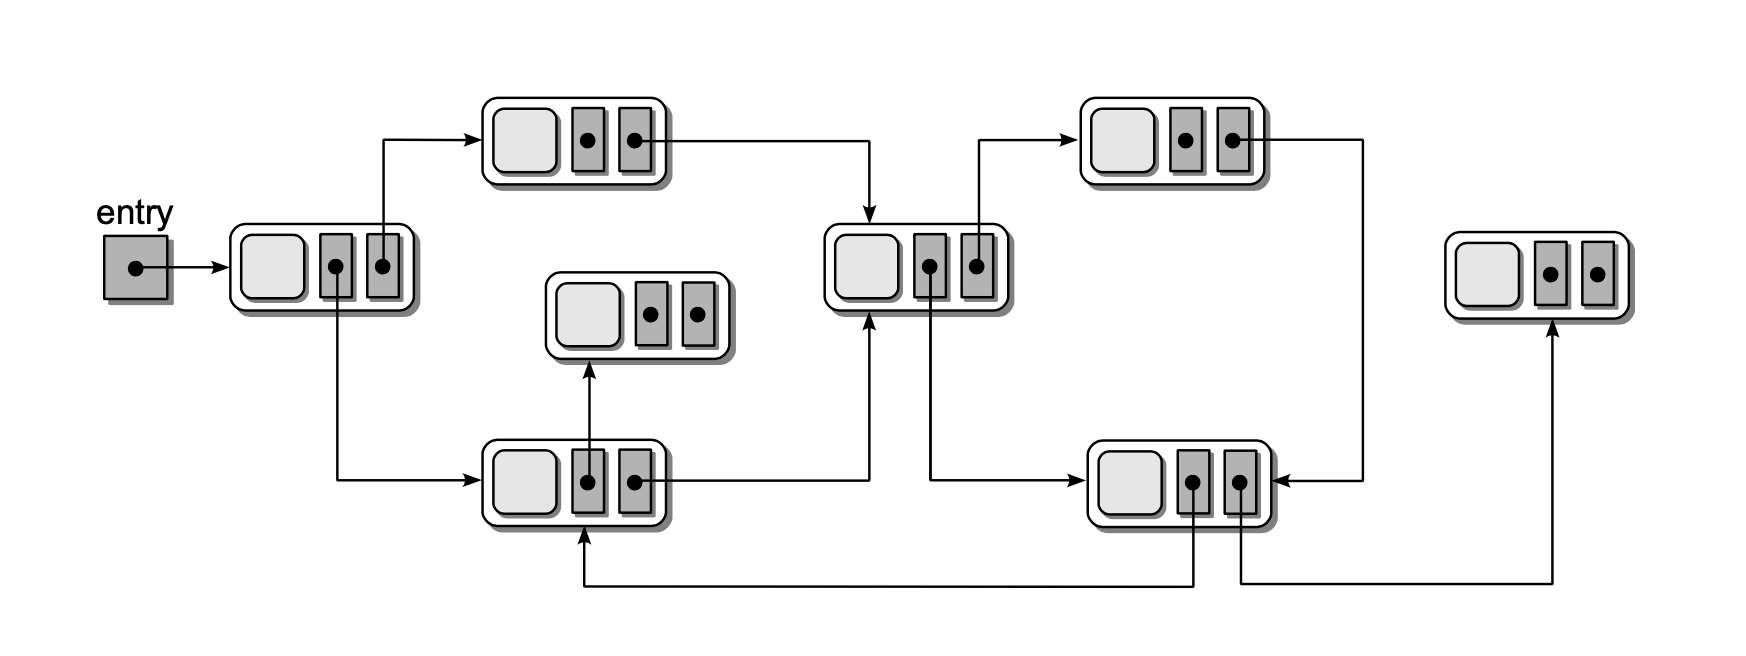

* **External References: We use the term *external reference* to indicate those reference variables that point to a node but are not themselves contained within a node as is the case with the link fields.**

In [5]:
class ListNode:
    def __init__(self, data):
        self.data = data
        self.next = None

## 6.2 The Singly Linked List
* **A *singly linked list* is a linked list in which each node contains a signle linke field anf allows for a complete traversal from a distinctive first node to the last.**

### 6.2.1 Traversing the Nodes
* **We can use a temporary external reference to traverse through the list, moving the reference along as we access the individual nodes.**
    * **The process starts by assigning a temporary external reference $curNode$ to point to the first node of the list. After entering the loop, the value stored in the first node is printed by acccessing the data component stored in the node using the external reference.**
* **A complete list traversals requires $O(n)$ time since each node must be accessed and each access only requires constant time.**

In [2]:
def traversal(head):
    curNode = head
    while curNode is not None:
        print(curNode.data)
        curNode = curNode.next

## 6.2.2 Searching for a Node
* **A linear search operation can be performed on a linked list. It is very similar to the traversal demonstrated earlier. The only difference is that the loop can terminate early if we find the target value wigin the list.**
* **It is important that we test for a null $curNode$ reference before trying to examine the contents of the node. If the item is not found in the list, $curNode$ will be null when the end of the list is reached.**

In [3]:
def unorderedSearch(head, target):
    curNode = head
    while curNode is not None and curNode.data != target:
        curNode = curNode.next
    return curNode is not None

* **It is important we test for a null $curNode$ reference before trying to examine the contents of the node. If the item is not found in the list, $curNode$ will be null when the end of the list is reached.**

### 6.2.3 Prepending Nodes
* **When working with an unordered list, new values can be inserted at any point within the list.**
* **Prepending a node can be done in constant time since no traversal is required.**

In [ ]:
# Given the head pointer, prepend an item to an unsorted linked list
newNode = ListNode(item)
newNode.next = head
head = newNode

* **Adding an item to the dront of the list requires several steps.**
    1. **We must create a new node to store the new value and then set its $next$ field to point to the node currently at the front of the list.**
    1. **We then adjust $head$ to point to the new node since it is now the first node in the list.**
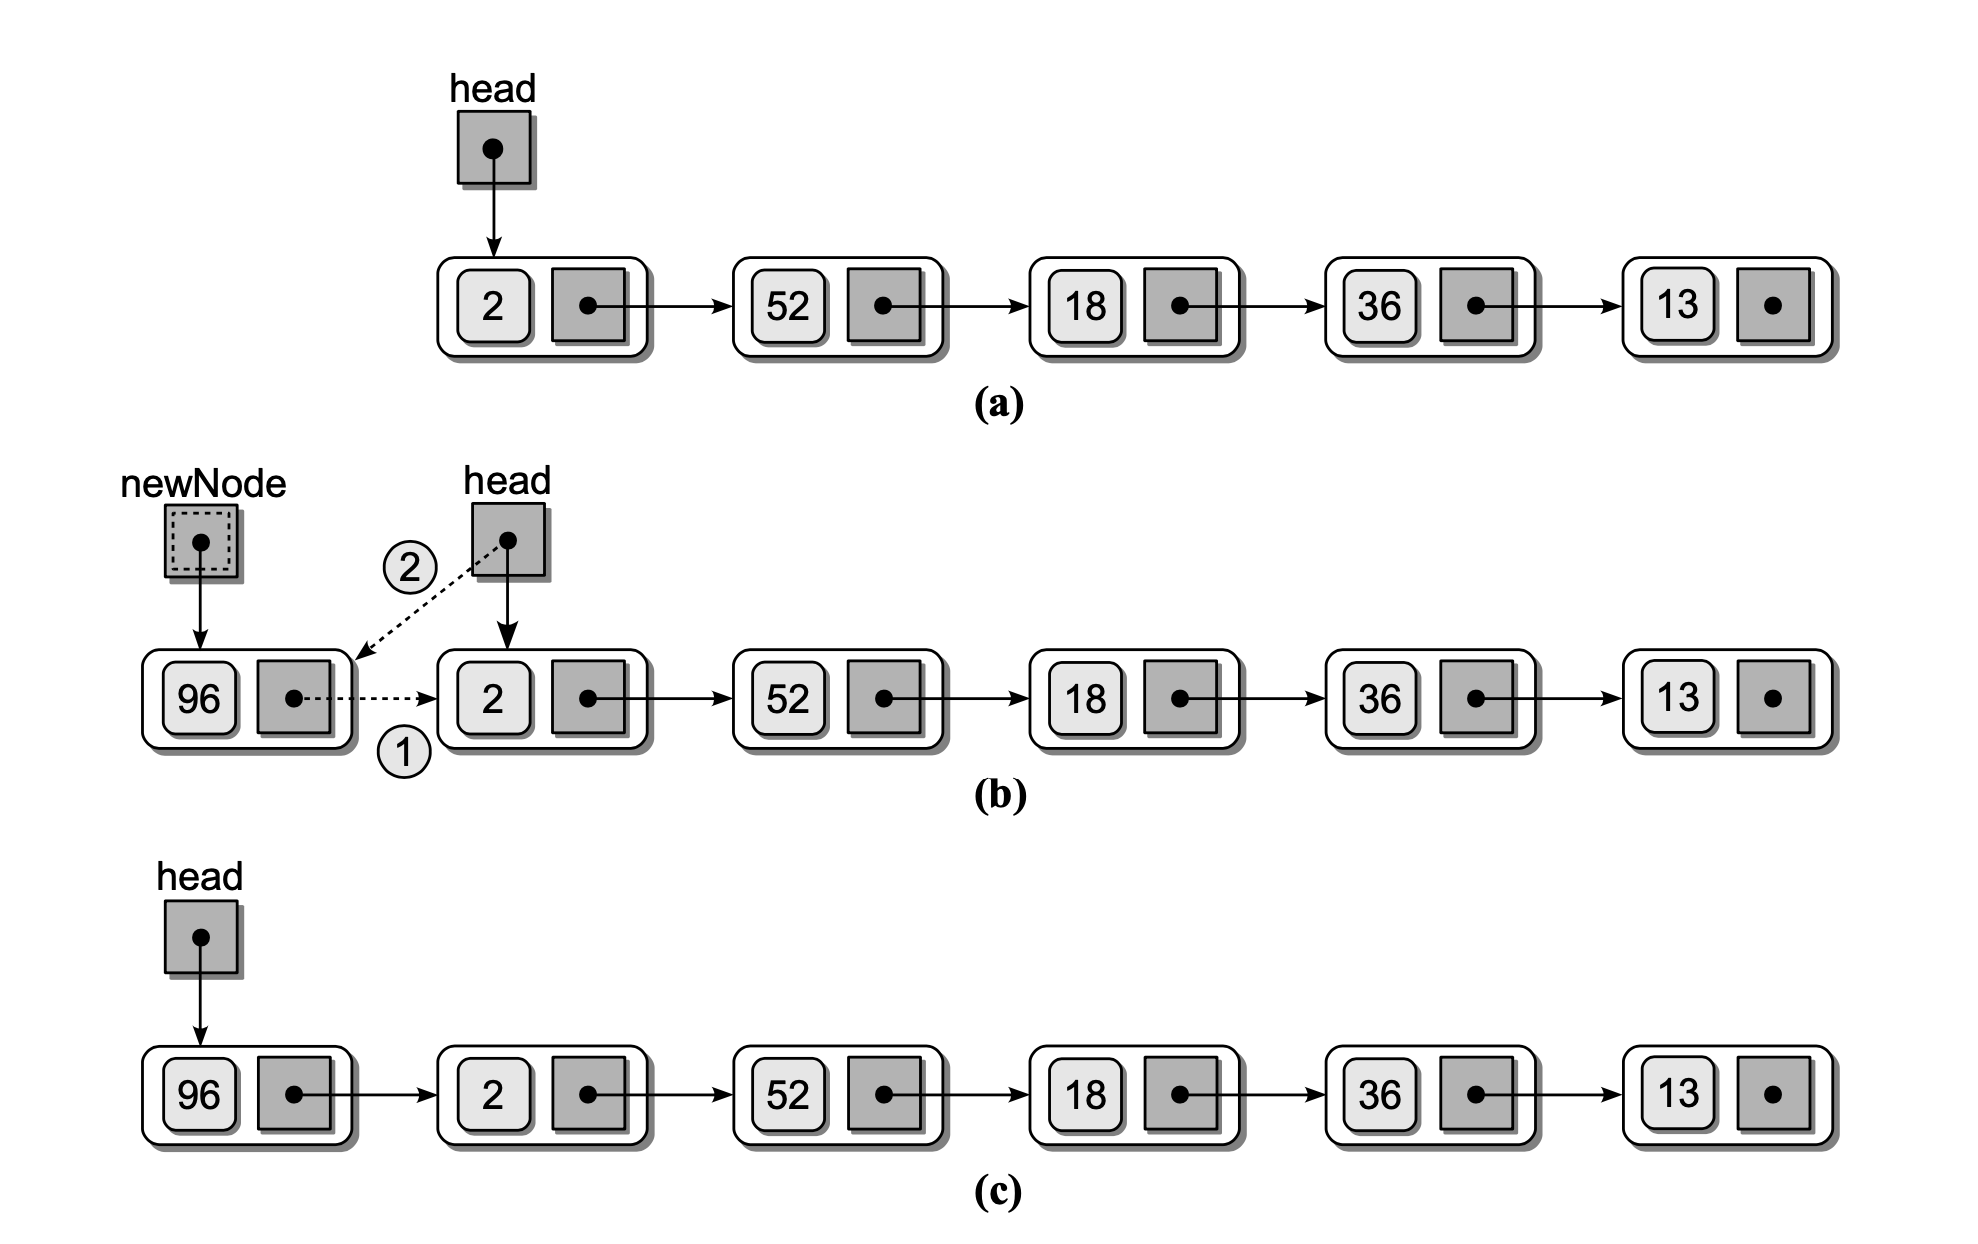

### 6.2.4 Removing Nodes
* **An item can be removed from a linked list by removing or unlinking the node containing the item. Consider the linked list and assume we want to remove the node containing.**
    * **First, we must find the node containing the target value and position an external reference variable pointing to it.**
    * **After finding the node, it has to be unlinked from the list, which entails adjusting the link field of the node's predecessor to point to its successor.**
* **Accessing the node's sucessor is very simple using the $next$ link of the node. But we must also access the node's predecessor in order to change its link.**
    * **The only way we can do this is to position another external reference simultaneously during the search for the given node.**

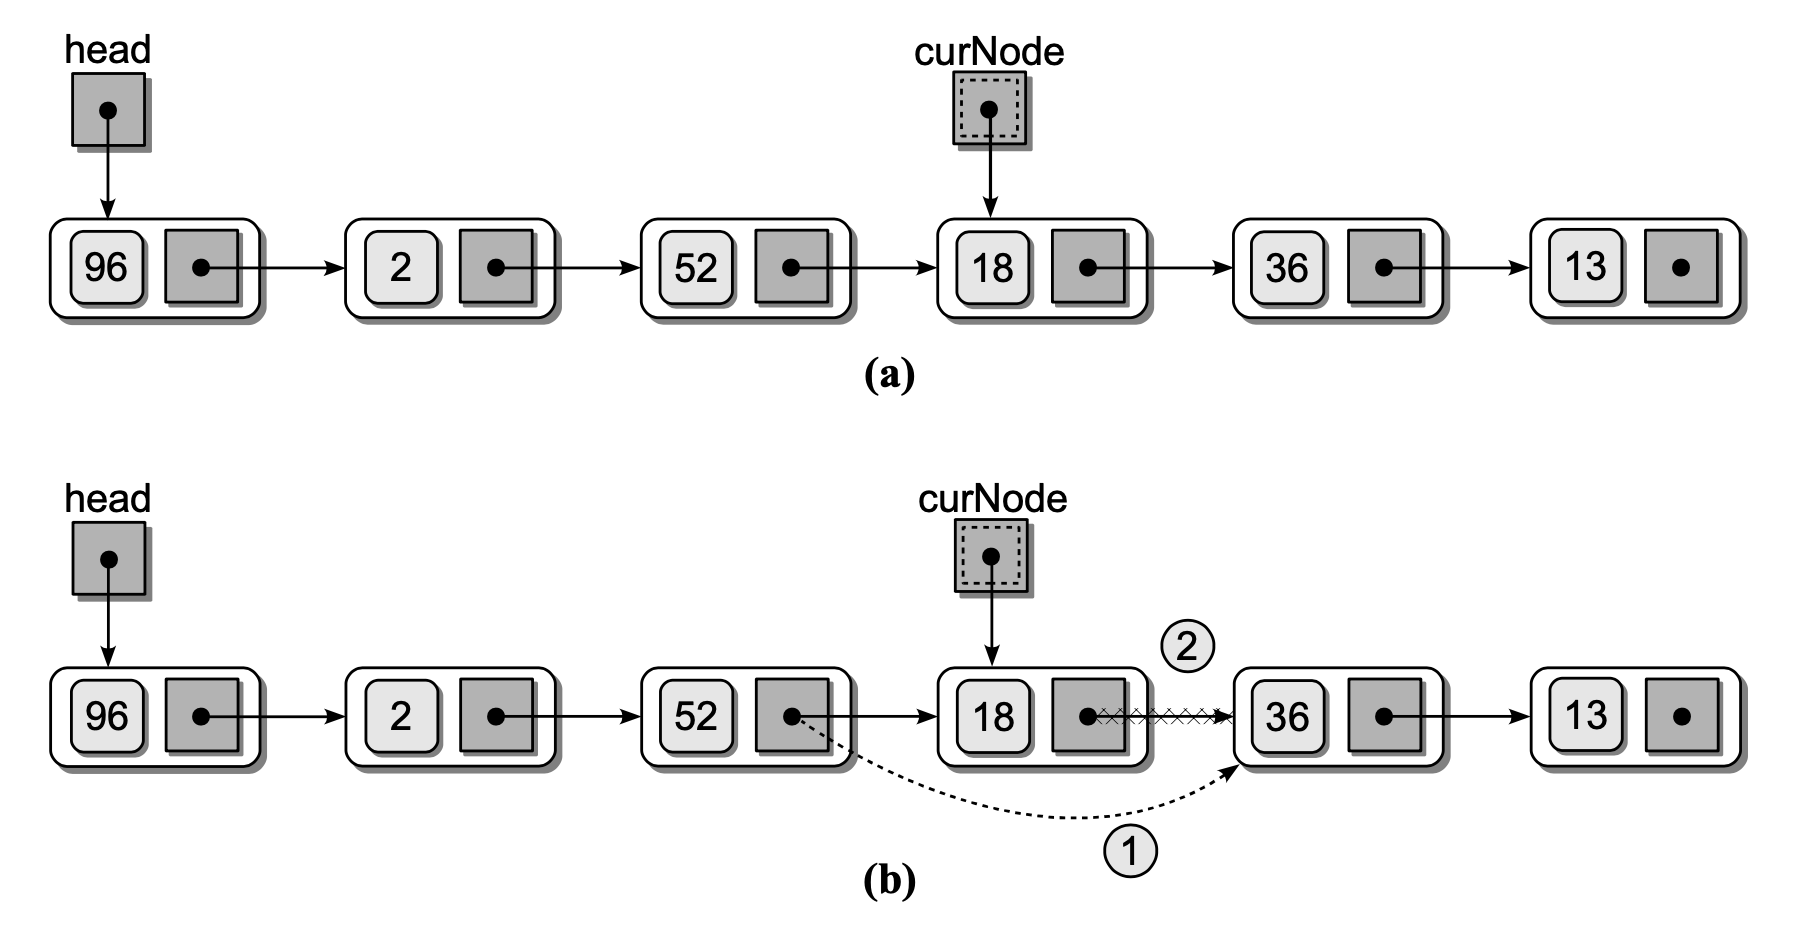

* **Removing the first node from the list is a special case since the head pointer references this node. There is no predecessor that has to be relinked, but the head reference must be adjusted to point to the next node.**
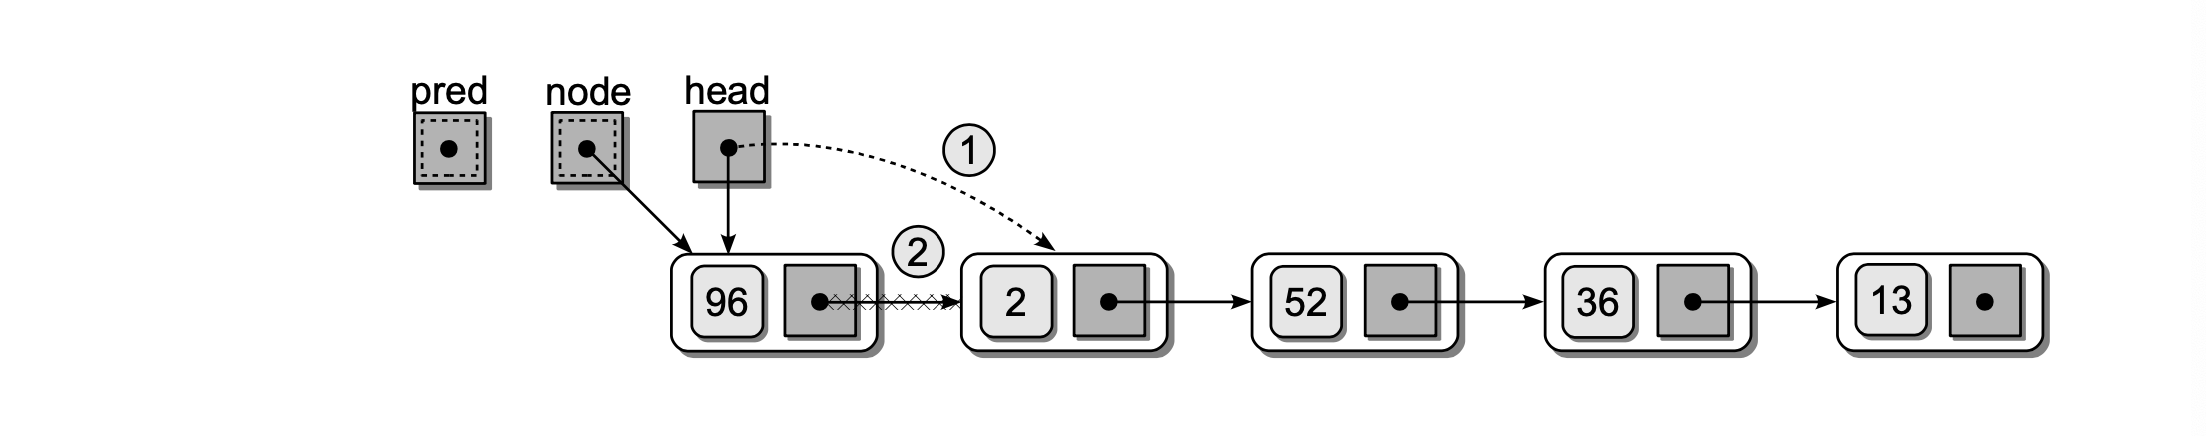

* **The $curNode$ external reference is initially set to the first node in the list, the same as is done in the traversal and search operations.**
* **The $predNode$ external reference is set to $None$ since there is no predecessor to the first node in the list.**
* **As the $curNode$ reference is moved along the list in the body of the loop, the $predNode$ reference follows behind.**
* **A loop is used to position the two temporary reference variables. As the $curNode$ reference is moved along the list in the body of the loop, the $predNode$ reference follows behind.**
* $predNode$ **must be assigned to the reference the same node as $curNode$ before advanceing $curNode$ to reference the next node.**

* **After positioning the two external refereces, there are three possible conditions:**
    1. **The item is not in the list**
    1. **The item is in the first node.**
    1. **The item is somewhere else in the list.**

In [ ]:
# Given the head reference, remove a target from a linked list.
predNode = None
curNode = head
while curNode is not None and curNode.data != target:
    predNone = curNode
    curNode = curNode.next

if curNode is not None:
    if curNode is head:
        head = curNode.next
    else:
        predNode.next = curNode.next

## 6.3 The Bag ADT Revisited
### 6.3.1 A Linked List Implementation
* $\_head$ **field will store the head pointer of the linked list. The reference is initialized to $None$ to represent an empty bag.**
* $\_size$ **field is used to keep track of the number of items stored in the bag that is needed by the $\_\_len\_\_$ method.**
* **The $\_size$ field is used to keep track of the number of items stored in the bag that is needed by the $\_\_len\_\_$ method.**
    * **We only define a head pointer as a data field in the object. Temporary references such as the $curNode$ reference used to travsese the list are not defined as attributes, but instead as local variables within the individual methods as needed.**
* **The $contains( )$ method is a simple search of the linked list.**
    * **The $add( )$ method simply implments the prepend operation, though we must also increment the item counter $(\_size)$ as new items are added.**
* **The $remove( )$ method implements the removal operation. The $if$ statement that checked the status of the $curNode$ variable has neem replaced with an $assert$ statement.**
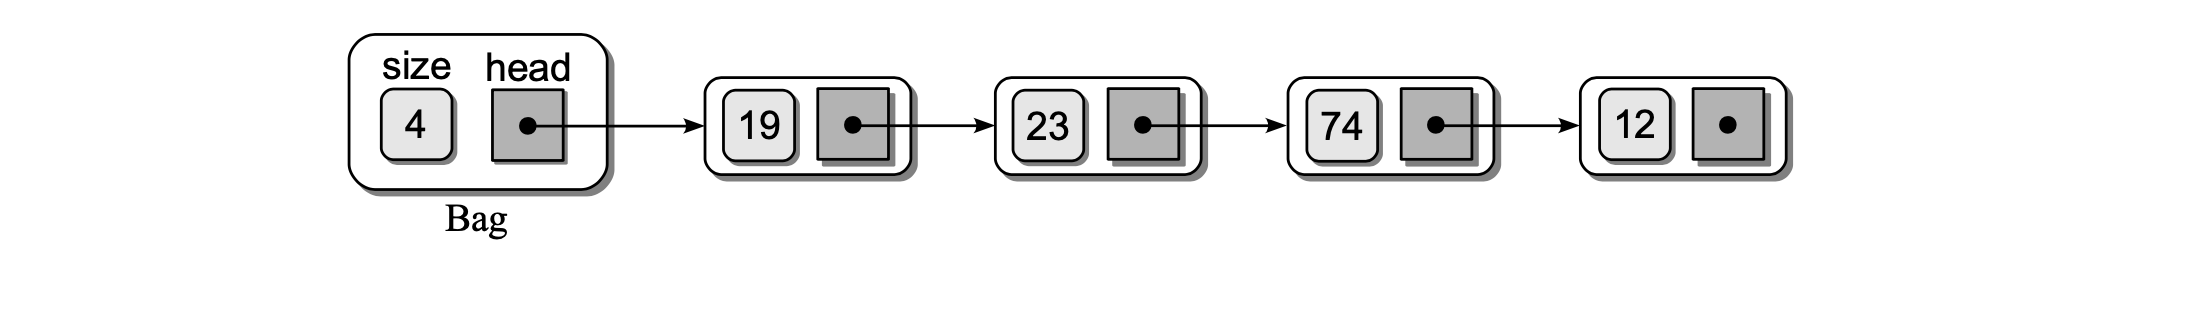

In [8]:
# Implements the Bag ADT using a singly linked list
class Bag:
    # Constructs an empty bag
    def __init__(self):
        self._head = None
        self._size = 0
        
    # Returns the number of items in the bag
    def __len__(self):
        return self._size
    
    # Determines if an item is contained in the bag
    def __contains__(self, target):
        curNode = self._head
        while curNode is not None and curNode.item != target:
            curNode = curNode.next
        return curNode is not None
    
    # Adds a new item to the bag
    def add(self, item):
        newNode = _BagListNode(item)
        newNode.next = self._head
        self._head = newNode
        self._size += 1
    
    # Removes an instance of the item from the bag
    def remove(self, item):
        predNode = None
        curNode = self._head
        while curNode is not None and curNode.item != item:
            predNode = curNode
            curNode = curNode.next
        
        # The item has to be in the bag to remove it
        assert curNode is not None, "The item must be in the bag"
        
        # Unlink the node and return the item
        self._size -= 1
        if curNode is head:
            self._head = curNode.next
        else:
            predNode.next = curNode.next
        return curNode.item
    
    # Returns an iterator for traversing the list of items
    def __iter__(self):
        return _BagIterator(self._head)
    
# Defines a private storage class for creating list nodes
class _BagListNode(object):
    def __init__(self, item):
        self.item = item 
        self.next = None

### 6.3.2 Comparing Implementations
* **When adding an item to a bag implemented using a Python list, the item is appended to the list, which requires $O(n)$ time in the worst case since the underlying array must have to be expanded.**
* **In the linked list version of the Bag ADT, a new bag item is stored in a new node that is prepended to the linked structure, which only requires $O(1)$.**
* **The linked list is typically a better choice for those applications involving large amounts of *dynamic data*, data that changes quite often.**
* **Python list is a better choice for those applications where individual elements must be accessed by index.**

### 6.3.3 Linked List Iterators
* **This reference will be advanced through the linked list as the $for$ loop iterates over the nodes.**
* **The $\_iter\_$ method, which returns an instance of the $\_BagIterator$ class.**
* **The $\_curNode$ pointer in the $\_BagIterator$ object is used just like the $curNode$ pointer. The only difference is that we don't include a $while$ loop since Python manages the iteration for us as part of the $for$ loop**
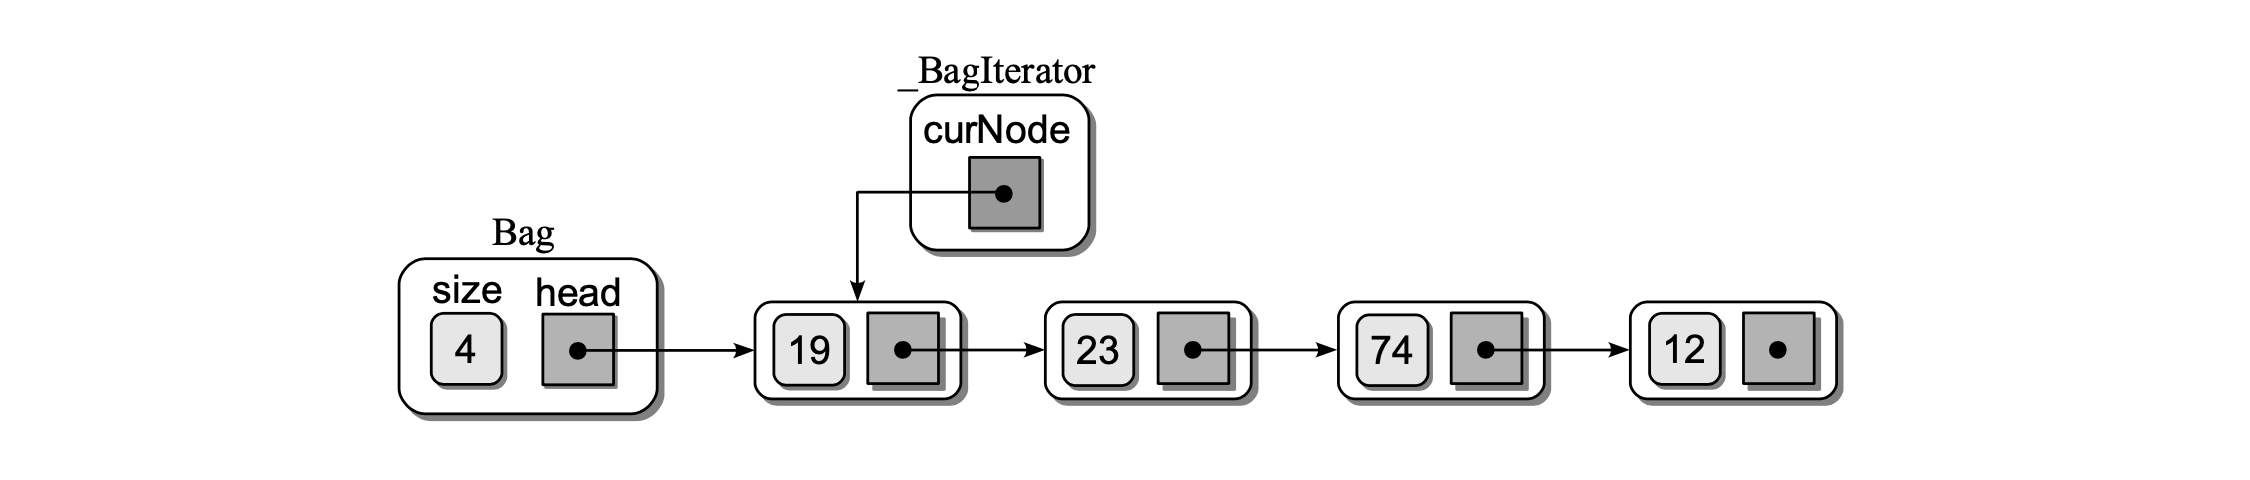

In [9]:
# Defines a linked list iterator for the Bag ADT
class _BagIterator:
    def __init__(self, listHead):
        self._curNode = listHead
    
    def __iter__(self):
        return self
    
    def next(self):
        if self._curNode is None:
            raise StopIteration
        else: 
            item = self._curNode.item
            self._curNode = self._curNode.next
            return item

## 6.4 More Ways to Build a Linked List
* **A linked list can also be used to implement a container abstract data type that requires a specific linear ordering of its elements, such as with a Vector ADT.**

### 6.4.1 Using a Tail Reference
* **Appending a new node to the list using only a head reference requires linear time since a complete taversal is required to reach the end of the list.**
* **Instead of a single external head reference, we can use two external references, one for the head and one for the tail.**
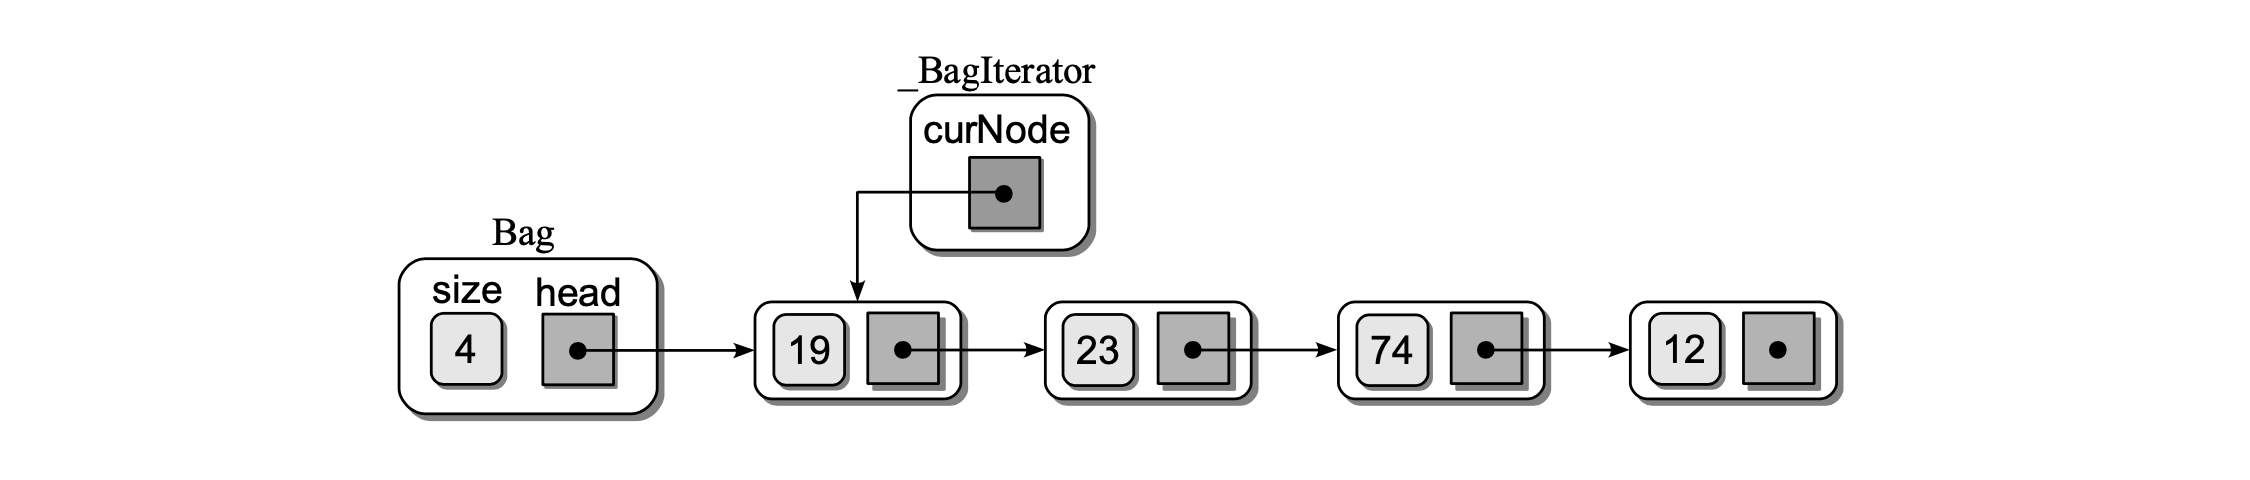

#### Appending Nodes
* **Adding the external tail reference to the linked list requires that we manage both references as nodes and removes.**
    1. **A new node is created to store the value to be appended to the list.**
    1. **The node is linked into the list following the last node. The $next$ field of the node reference by the $tail$ is set to point to the new node.**
    1. **If the list is empty, there is no existing node in which the link field can be adjusted.**
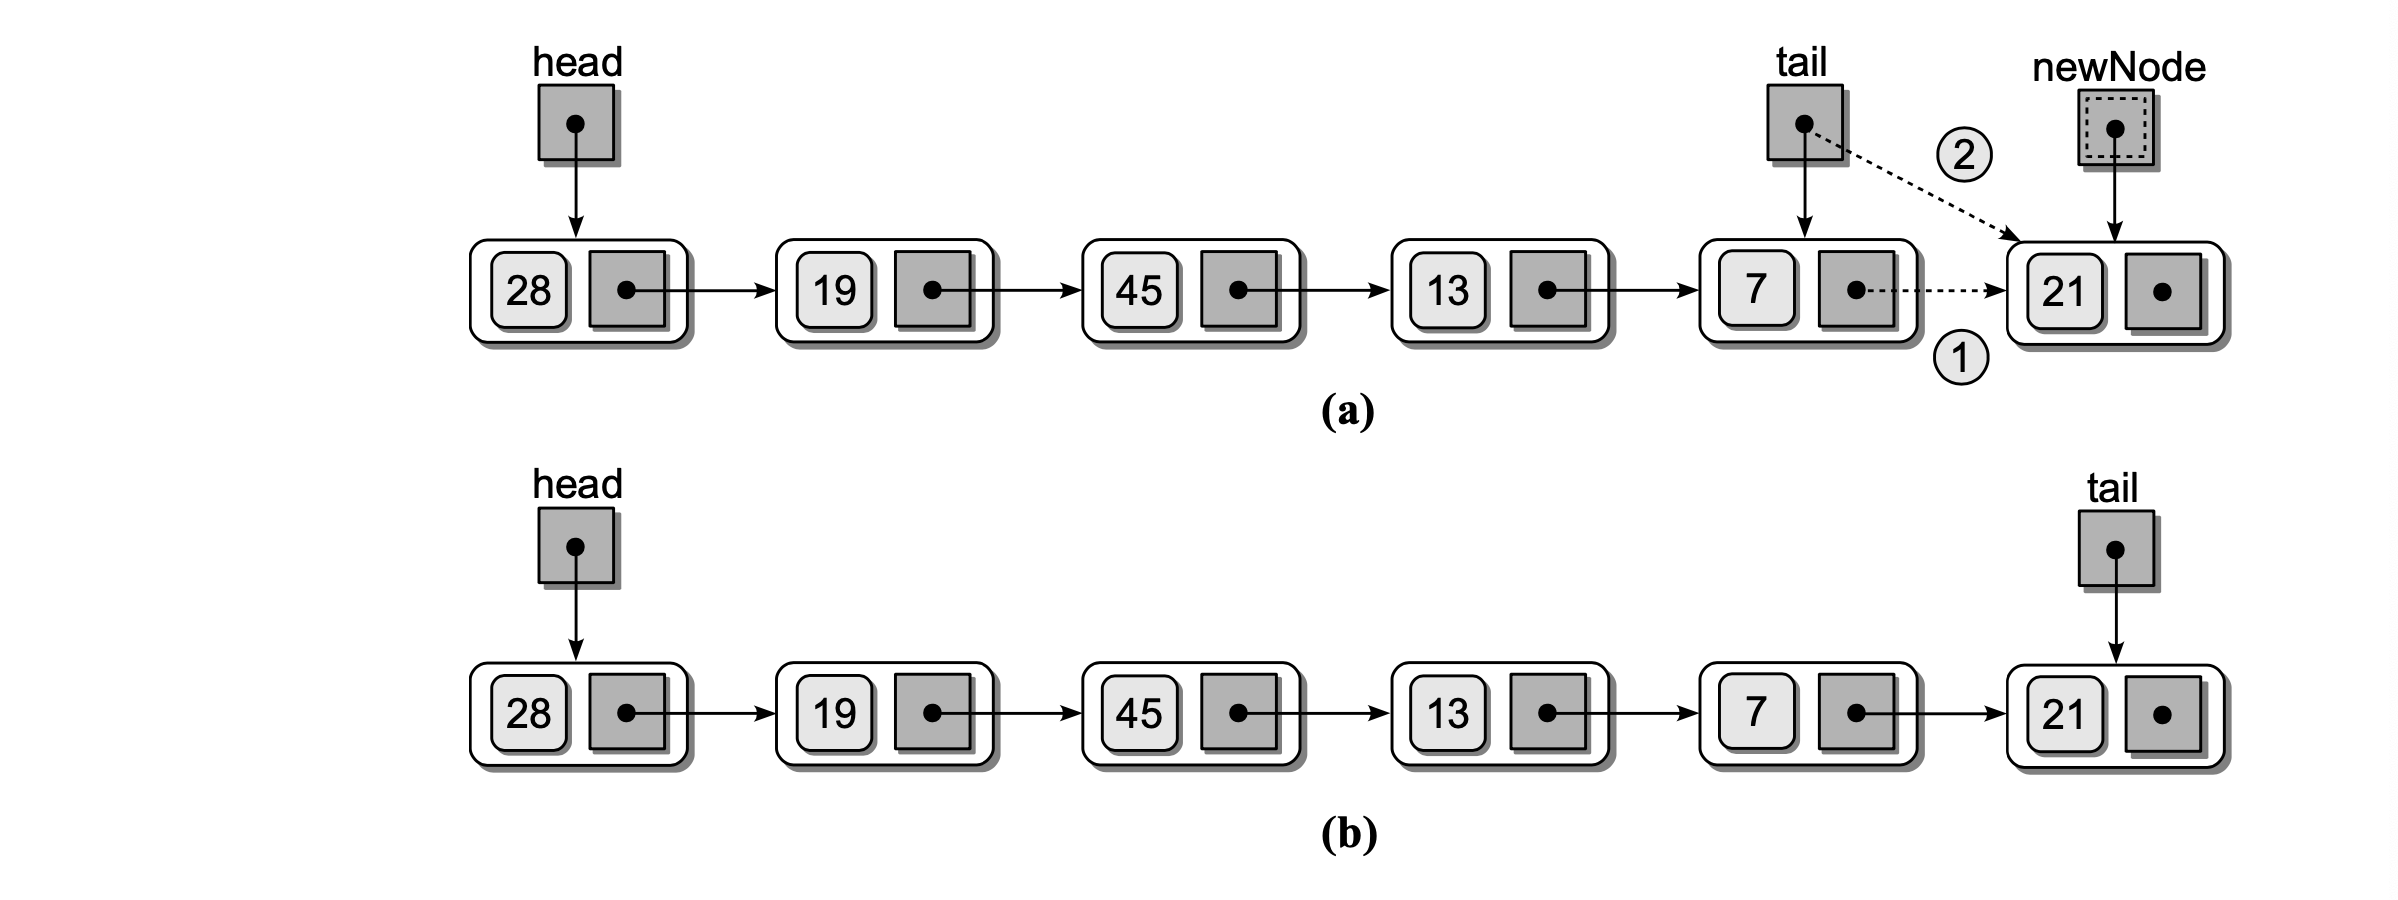

In [ ]:
# Given the head and tail pointers, adds an item to a linked list
newNode = ListNode(item)
if head is None:
    head = newNode
else: 
    tail.next = newNode
tail = newNode

#### Removing Nodes
* **After unlinked the node to be removed, we must check if it was at the end of the list. If it was, we must adjust the tail reference to point to the same node as $predNode$, which is not the last node in the list.**
* **If the list contians a single node, the $head$ reference will be assigned $None$ when it is assigned the contents of the node's $next$ field. The $tail$ reference will also be set to $None$ when it is set to $predNode$.**

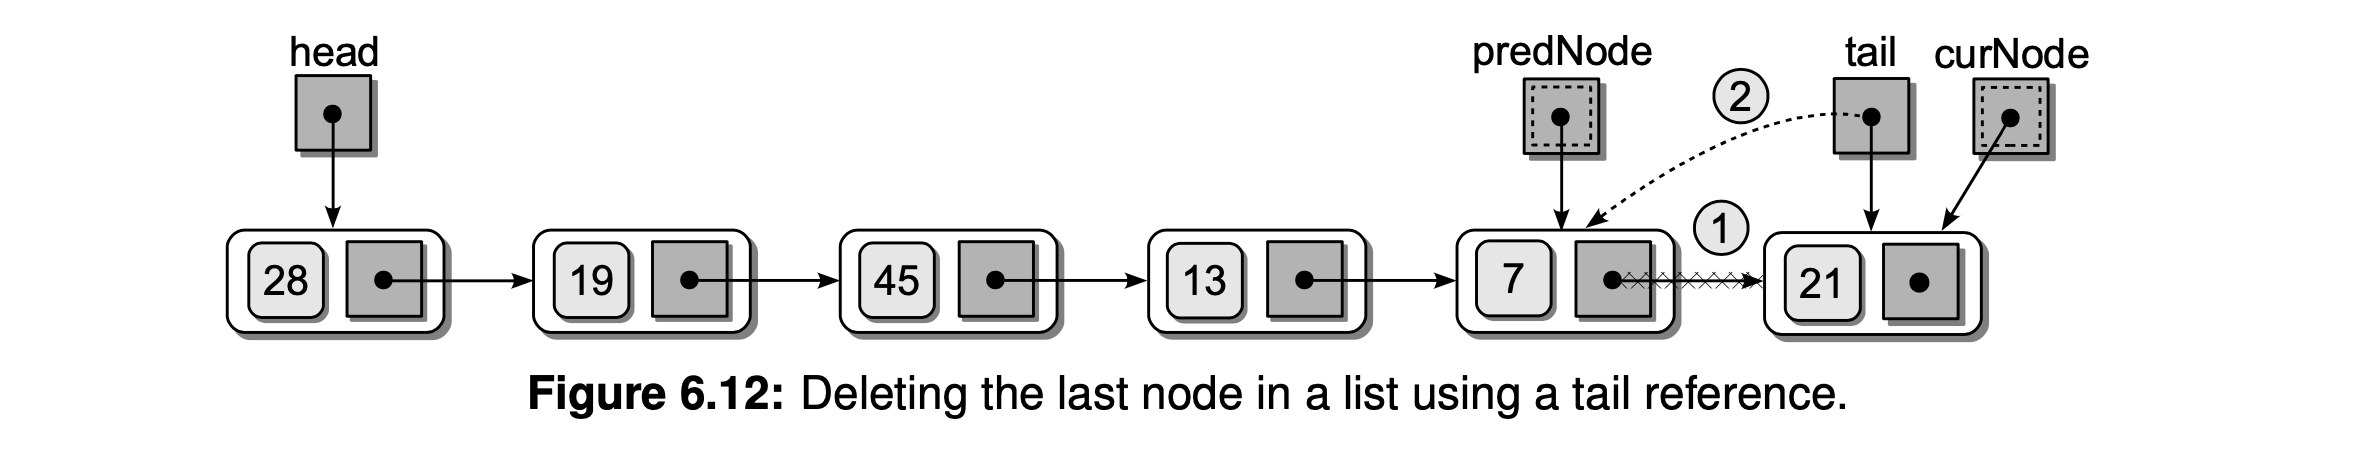

In [ ]:
# Given the head and tail references, removes a target from a linked list
predNode = None
curNode = head
while curNode is not None and curNode.data != target:
    predNode = curNode
    curNode = curNode.next
    
if curNode is not None:
    if curNode is head:
        head = curNode.next
    else:
        predNode.next = curNode.next
    if curNode is tail:
        tail = predNode

### 6.4.2 The Sorted Linked List

#### Linear Search
* **The only change required is to add a second condition that terminates the loop early if we encounter a value larger than the target.**

In [10]:
def sortedSearch(head, target):
    curNode = head
    while curNode is not None and curNode.data < target:
        if curNode.data == target:
            return True
        else:
            curNode = node.next
        return False

#### Inserting Nodes
* **Adding a new node to an unsorted linked list is simple because we can add it to the front end of the list since its placement is not important/**
* **When adding a node to a sorted list, however, the correct position for the new value must be found and the new node linked into the list at that position.**
    * **As with the removal operation for the unsorted list, we must position two temporaray external references by traversing through the linked list searching for the correct position of the new value.**
    * **The only difference is the loop termination conditon. To insert a new node, we must terminate the loop upon finding the first value larger than the new value being added.**
* **If the new node is to be inserted in the front, then the operation is simple prepend, and the curNode will be pointing to the first node.**
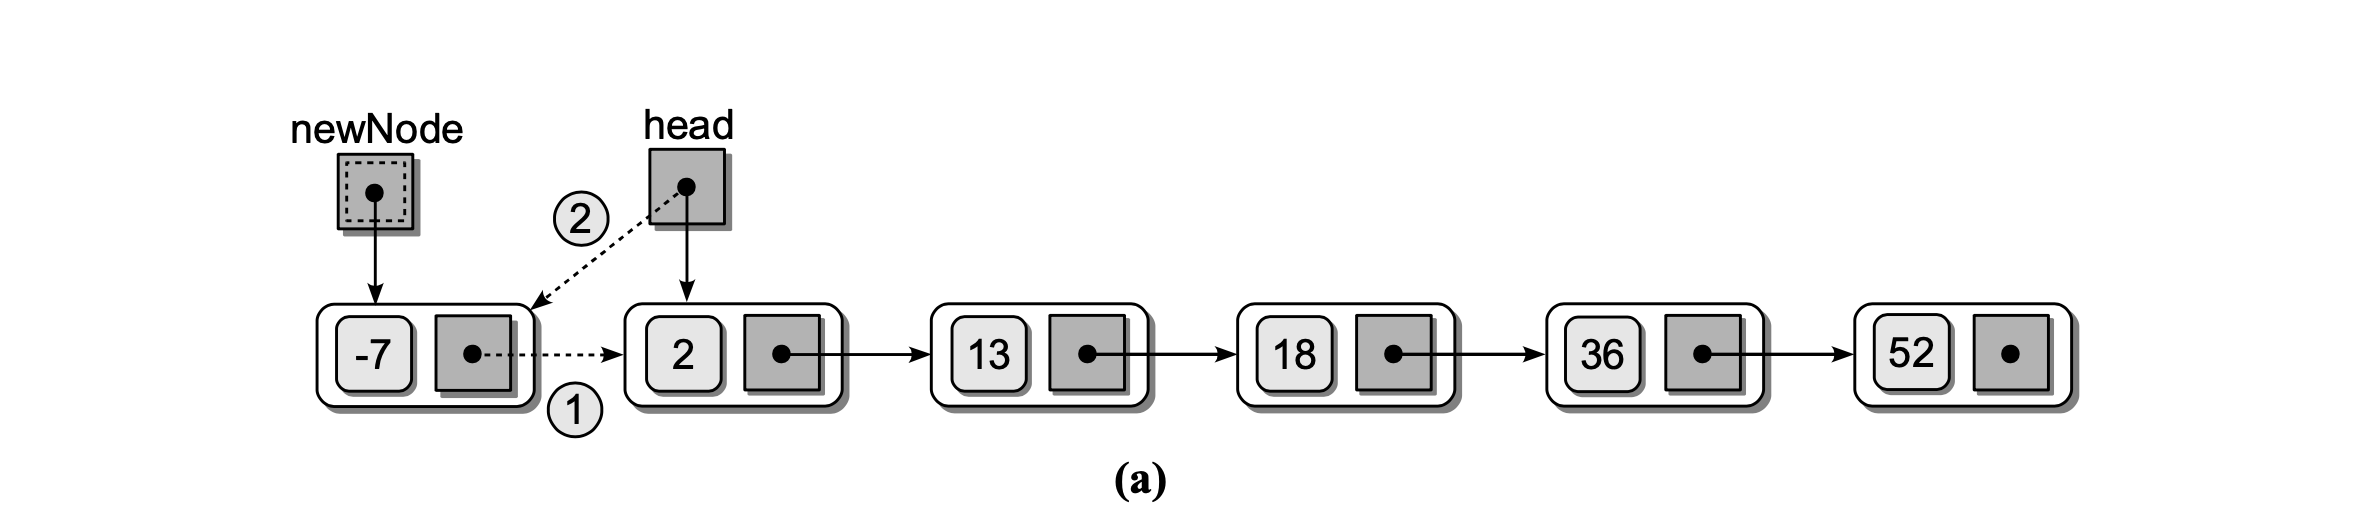
* **When the new value being added is the largest in the list and the new node is to be added at the end, $curNode$ will be null and thus the $next$ field will be null as it should be.**
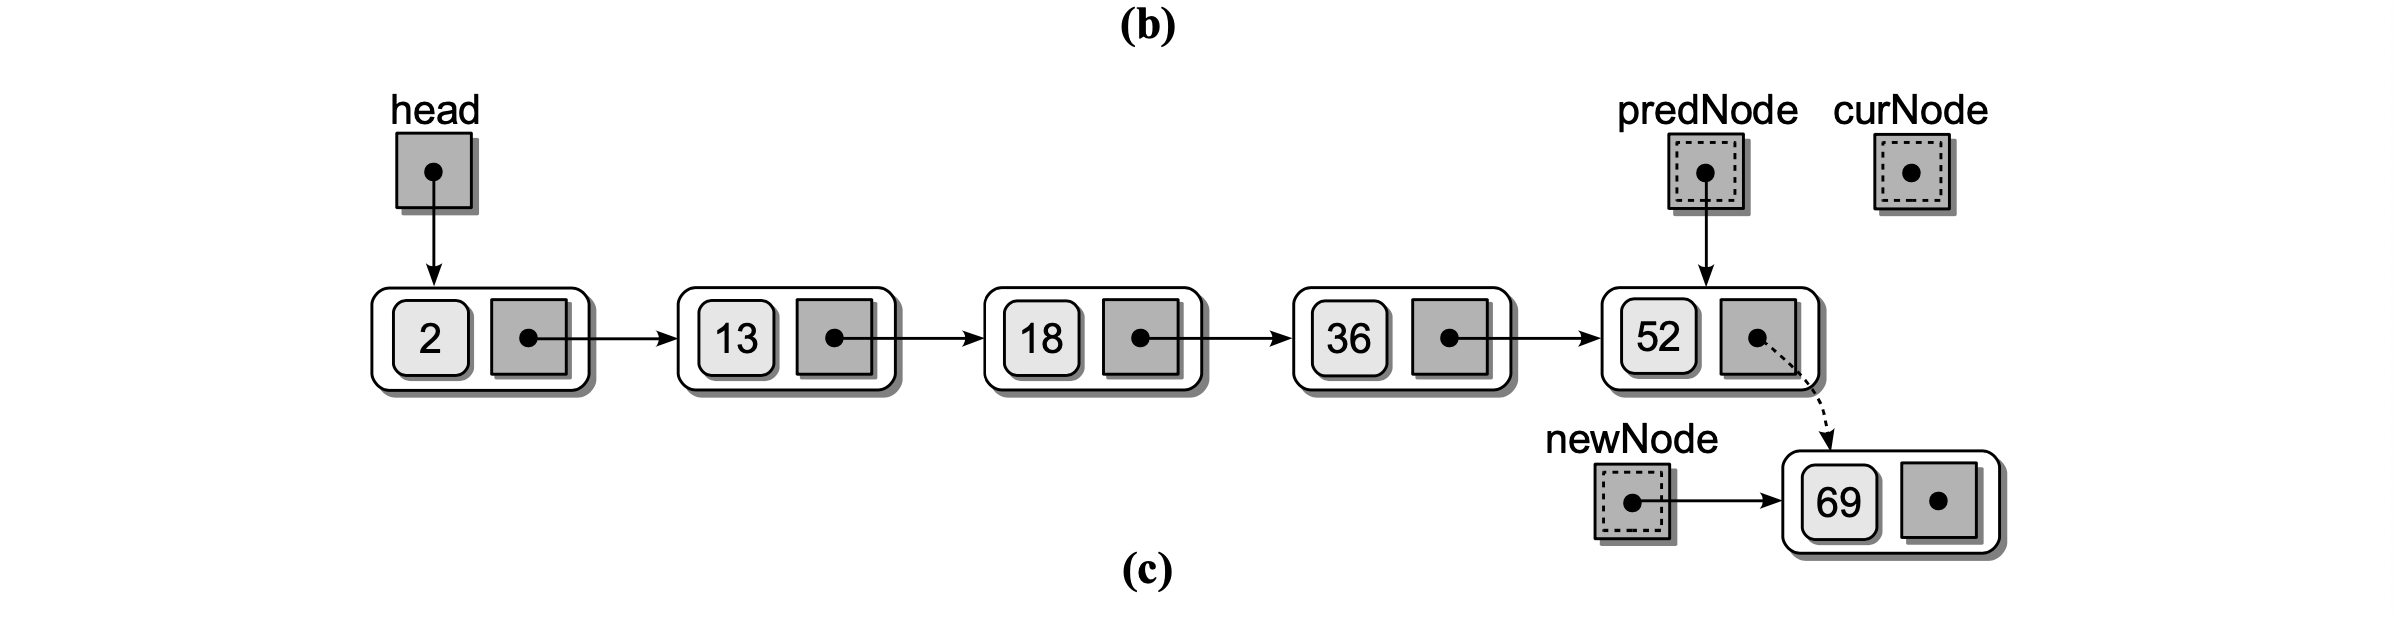
* **When the new value being added is the largest in the list and the new node is to be added at the end, $curNode$ will be null and thus the $next$ field will be null as it should be.**
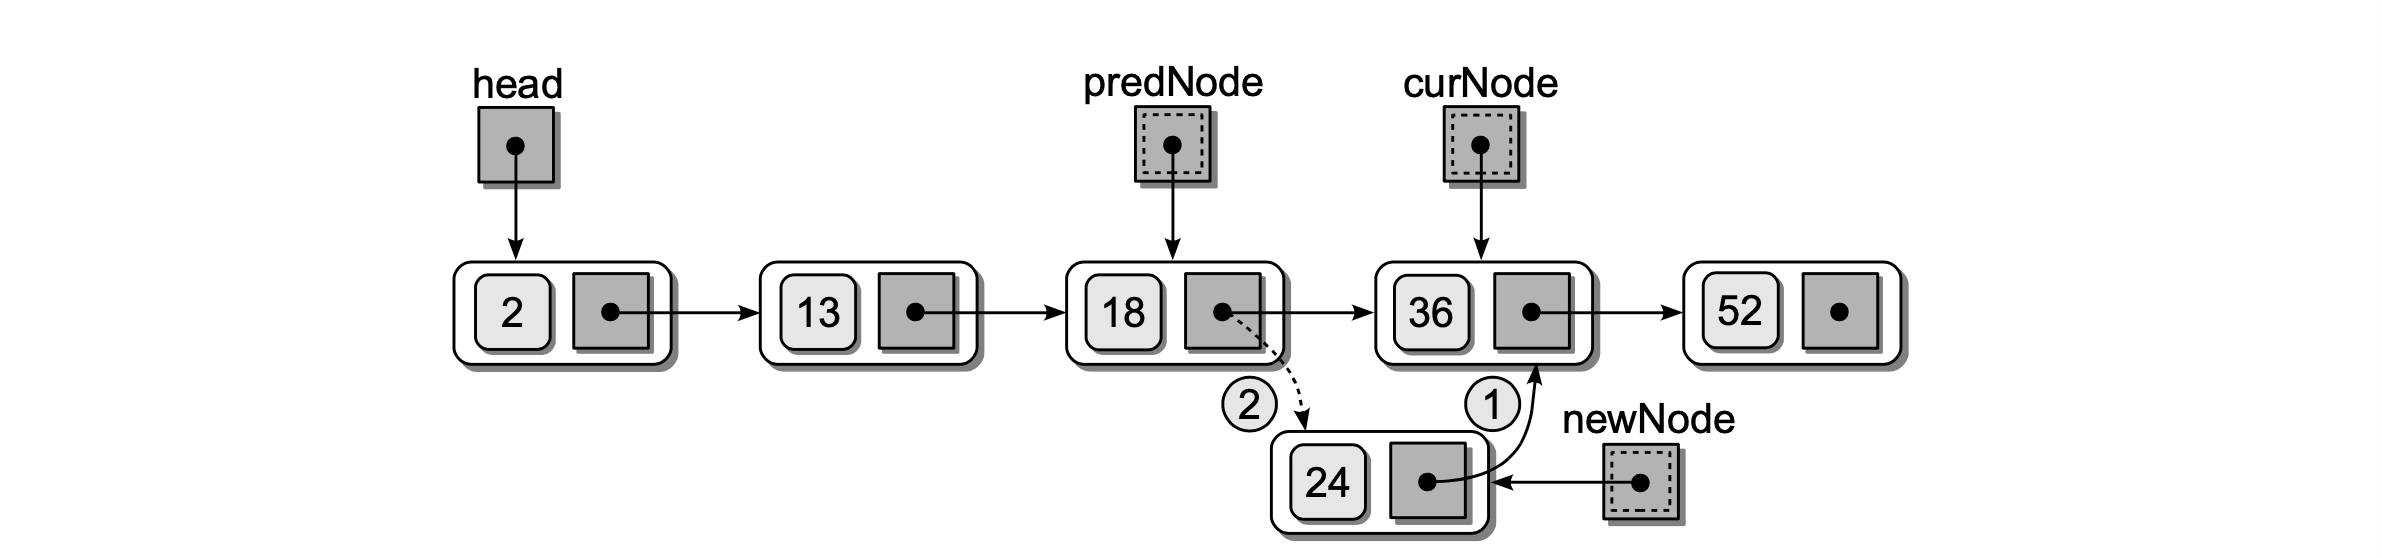

In [ ]:
# Given the head pointer, insert a value into a sorted list
# Find the insertion point for the new value
predNode = None
curNode = head
while curNode is not None and value > curNode.data:
    predNode = curNode 
    curNode = curNode.next

# crete the new node for the new value
newNode = ListNode(value)
newNode.next = curNode
# Linke the new node into the list
if curNode is head:
    head = newNode
else:
    predNode.next = newNode

#### Traversing and Deleting
* **The traversal operation implmented for the unsorted list can be used with both sorted and unsorted lists since it is not dependent on the contents of the list itself.**
* **Deleting from a sorted linked list is the same operation used with an unsorted list with one exception. Searching for the node contianing the target value can end early after encountering the first value larger than the one to be deleted.**

## 6.5 The Sparse Matrix Revisited
* **Instead of storing the elements in a single list, however, we can use an array of sorted linked lists, one for each row of the matrix. The non-zero elemnts for a given row will be stroed in the corresponding linked list sorted by column index.**
    * **The row index is not needed since it corresponds to a specific linked list within the array of linked lists.**
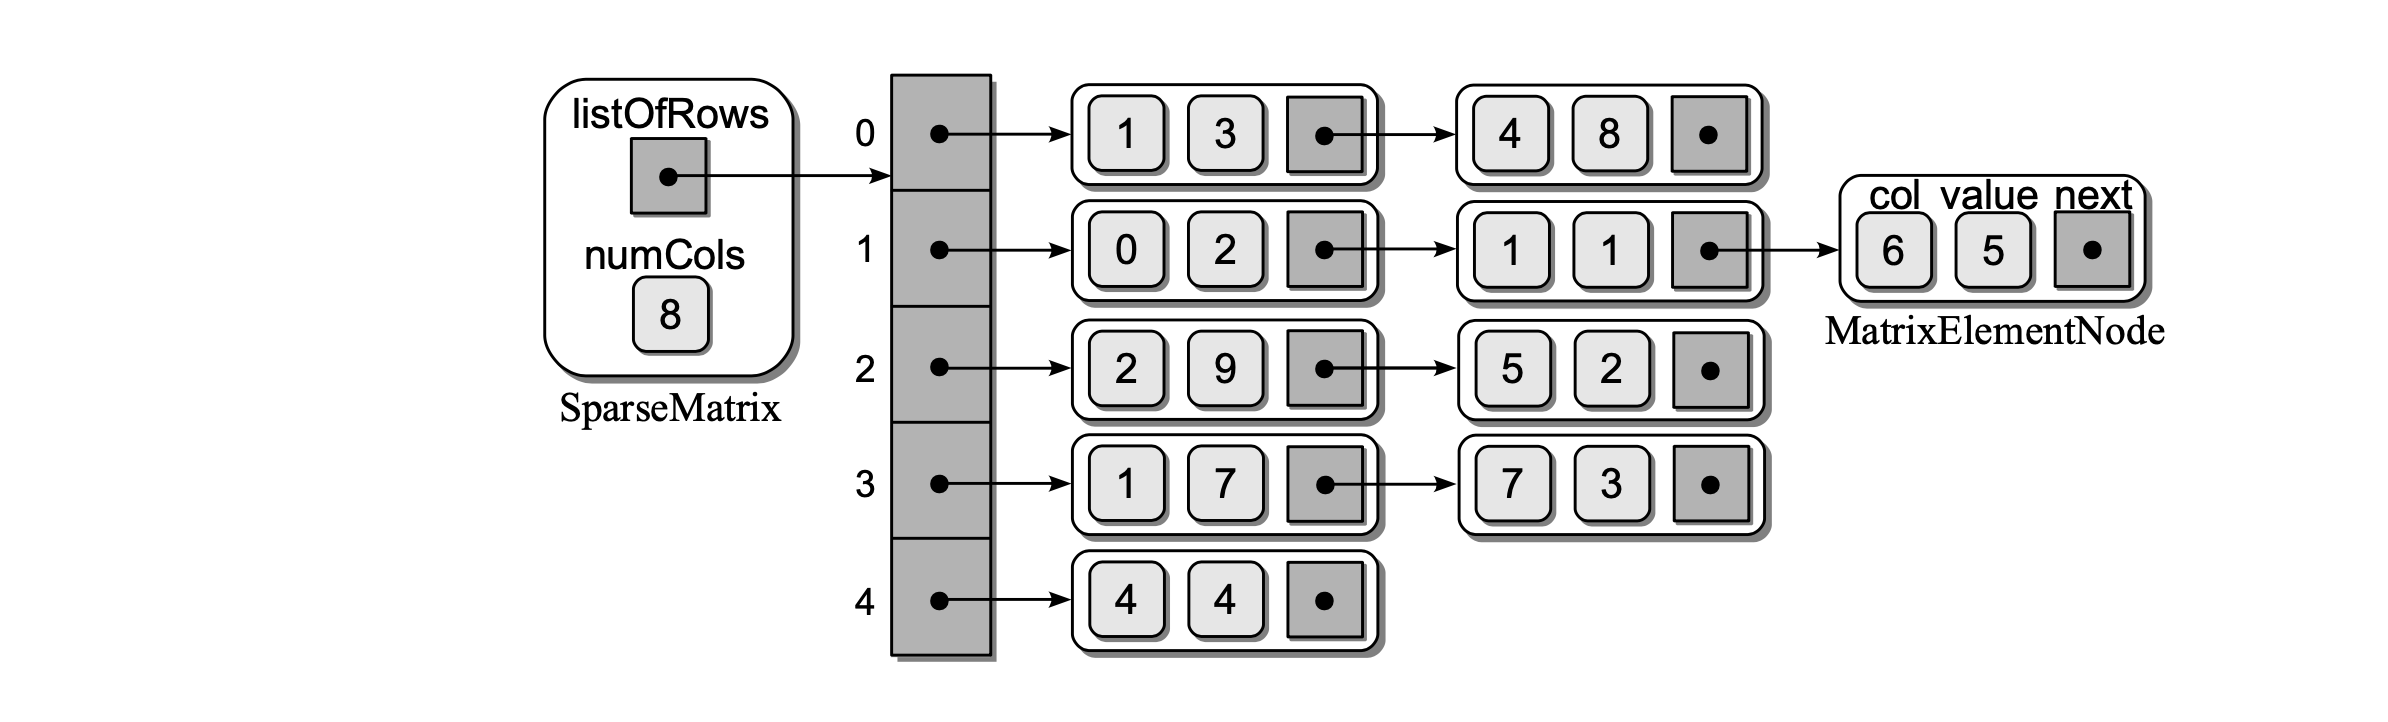

### 6.5.1 An Array of Linked Lists Implementation
* **In the constructor, two class fields are created: one to store the number of columns in the matrix and another to store the array of head references to the to the linked lists in which the matrix will be stored.**
* **The individual elements are intialized to $None$ to represent empty linked lists since there are non-zero elements in the sparse matrix.**
    * **The row component has been removed while the $next$ link field was added in order to use the objects as linked nodes.**
    * **When elements are added to the sparse matrrix, nodes will be added to the individual linked lists based on the row index of the element.**

#### Changing Element Values
* **The $\_\_setitem\_\_$ method is the main linked list management routine for the underlying structure.**
    * **This method not only provides for the modification of element values, but it also handles node insertions for new non-zero elements and node removals when an element becomes zero.**
    * **The first step to postion the two external reference variables $predNode$ and $curNode$ along the linked list corresponding to indicated row index.**
    * **While only the $curNode$ reference will be needed for a simple element value modification, $predNode$ will be needed if we have to insert a new node or remove an existing node. After position the two referenes, we can then determine what action must be taken.**
    * $curNode$ **will be pointing to a node and the $col$ field of that node will be that of the elemnt.**
    * **If the element is not represented by a node in the linked list of the corresponding row and the new value is non-zero, then a new node must be inserted in the proper position based on the $predNode$ and $curNode$ references.**
    * **The only difference in the insertion operation is that the head reference is stored in one of the elements of the $\_listOfRows$ array instead of its own variable.**
    * **Setting the value of a matrix element requires $O(n)$ time in the worst case, where $n$ is the number of columns in the matrix.**

In [12]:
# Implementation of the Sparse Matrix ADT using an array of linked lists

class SparseMatrix:
    # Creates a sparse matrix of size numRows x numcols initialized to 0
    def __init__(self, numRows, numCols):
        self._numCols = numCols
        self._listOfRows = Array(numRows)
    
    # Returns the number of rows in the matrix
    def numRows(self):
        return len(self._listOfRows)
    
    # Return the number of columns in the matrix
    def numCols(self):
        return self._numCols
    
    # Sets the value of elememy(i, j) to the value s: x[i, j] = s
    def __setitem__(self, ndxTuple, value):
        predNode = None
        curNode = self._listOfRows[row]
        while curNode is not None and curNode.col != col:
            predNode = curNode
            curNode = curNode.next
        
        # See if the element is in the list
        if curNode is not None and curNode.col == col:
            if value == 0.0: # remove the node
                if curNode == self._listOfRows[row]:
                    self._listOfRows[row] = curNode.next
                else:
                    predNode.next = curNode.next
            else: # change the node's value
                curNode.value = value
        
        # Otherwise, the element is not in the list
        elif value != 0.0:
            newNode = _MatrixElementNode(col, value)
            newNode.next = curNode
            if curNode == self._listOfRows[row]:
                self._listOfRows[row] = newNode
            else:
                predNode.next = newnode
        
    # Scaled the matrix by the given scalar
    def scaleby(self, scalar):
        for row in range(self.numRows()):
            curNode = self._listOfRows[row]
            while curNode is not None:
                curNode.value *= scalar
                curNode = curNode.next
        
    # Matrix addition: newMatrix = self + rhsMatrix
    def __add__(self, rhsMatrix):
        # Make sure the two matrices have the correct size
        assert rhsMatrix.numRows() == self.numRows() and rhsMatrix.numCols() == self.numCols(), "Matrix sizes not compatible for adding"
        
        # create a new Matrix of the same size
        newMatrix = SparseMatrix(self.numRows(), self.numCols())
        
        # Add the elements of this matrix to the new matrix
        for row in range(self.numRows()):
            curNode = self._listOfRows[row]
            while curNode is not None:
                newMatrix[row, curNode.col] = curNode.value
                curNode = curNode.next
        
        # Add the elements of the rhsMatrix to the new matrix
        for row in range(rhsMatrix.numRows()):
            curNode = rhsMatrix._listOfRows[row]
            while curNode is not None:
                value = newMatrix[row, curNode.col]
                value += curNode.value
                newMatrix[row, curNode.col] = value
                curNode = curNode.next
            
        # Return the new matrix 
        return newMatrix

    # --- Matrix subtraction and multiplication ---
    # def __sub__ (seelf, rhsMatrix)
    # def __mul__(self, rhsMatrix)
    
# Storage class for creating matrix element nodes
class _MatrixElementNode:
    def __init__(self, col, value):
        self.col = col 
        self.value = value
        self.next = None

#### Matrix Scaling
* **We need only traverse over each of the individual linked list stored in the $\_listOfRows$ array, during which we scale the value stored in each node.**
* **The matrix scaling operation requires $O(k)$ time in the worst case since only the $k$ non-zero elements are stored in the structure.**

#### Matrix Addition
* **We first create a new $SparseMatrix$ object that will contain the new matrix resulting from the addition.**
* **The contents of the $self$ or lefthand-size matrix is copied to the nes matrix, one element at a time.**
* **Finally we traverse over the non-zero elements of the righthand-size matrix and add the values of its non-zero elements to the new matrix.**

### 6.5.2 Comparing the Implementations
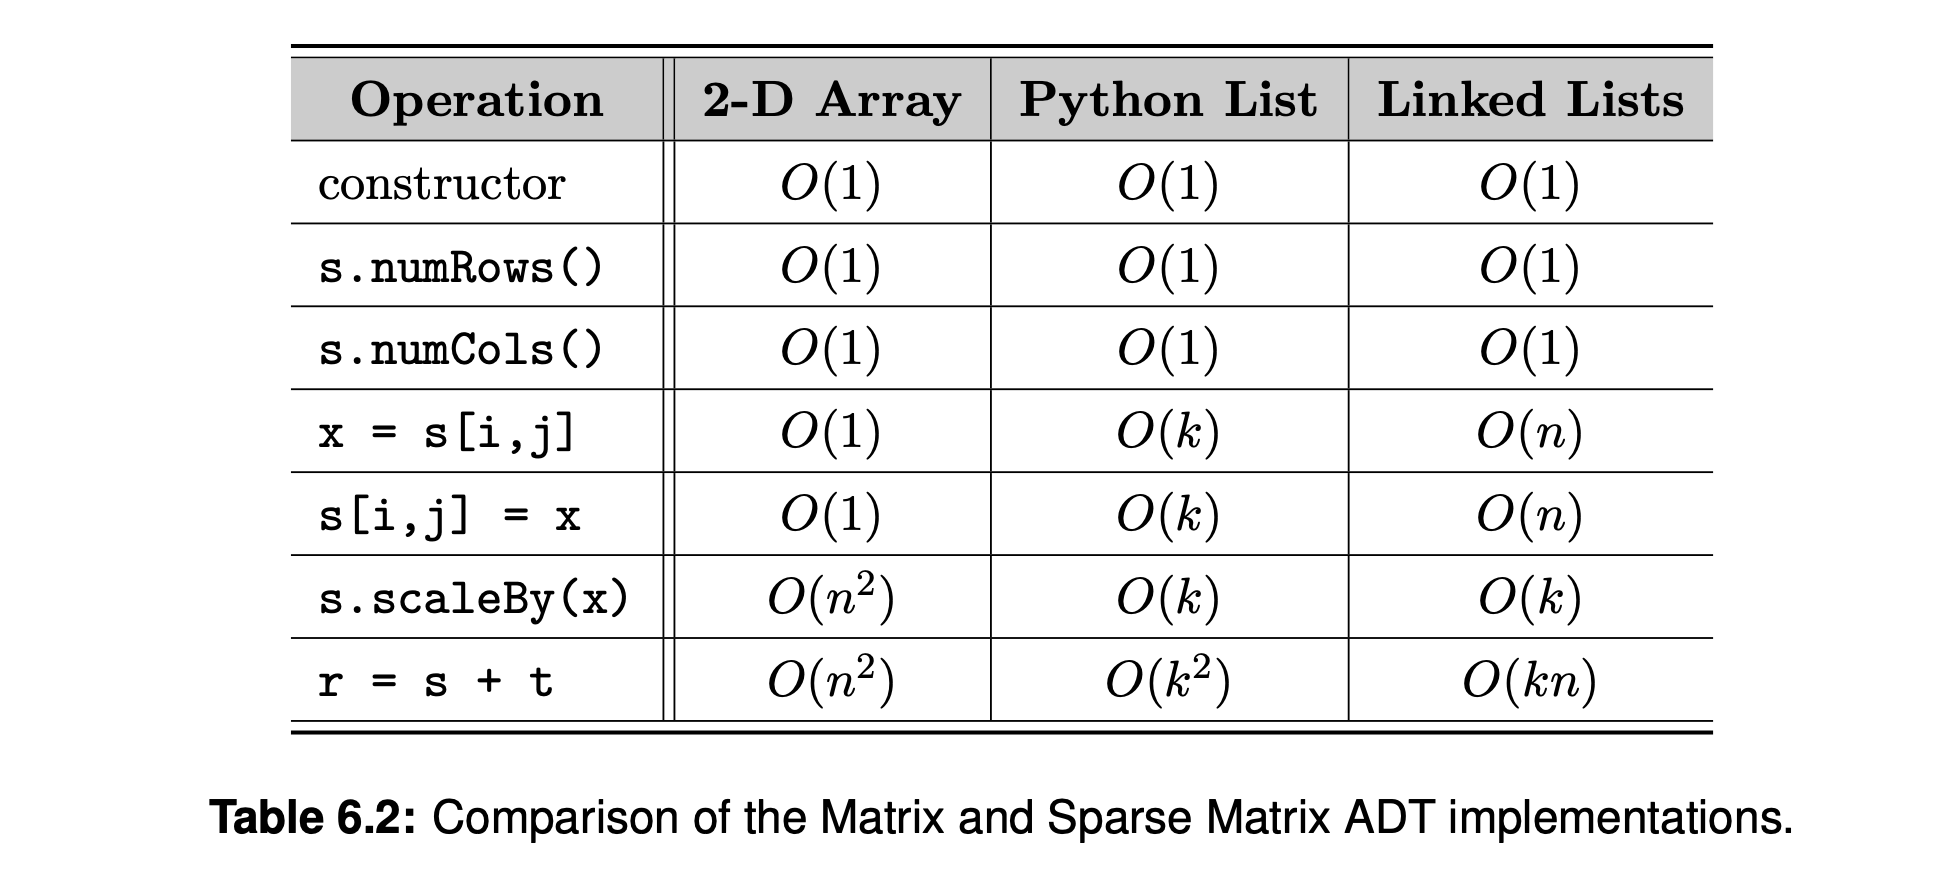

## 6.6 Application: Polynomials
$$ a_n x^n + a_{n-1}x^{n-1} + a_{n-2} x^{x-2}+ \dots + a_1 x^{1} + a_a $$
**where each $a_i x^{i}$ component is called a term. The $a_i$ part of the term, which is a scalar that can be zero, is called the *coefficient* of the term**

### 6.6.1 Polynomial Operations

#### Addition
* **Two polynomials of the same variables can be sumnmed by adding the coefficients of the corresponding terms of equal degree. The result is a third polynomial.**

#### Multiplication
* **The new polynomial is obtained by summing the result from multiplying each term of the first polynomial by each term of the second.**

#### Evaluation
* **Polynomials can be evaluated by assigining a value to the variable, commonly called the unknown. By making the variable known in specifying a value, the expression cna be computed, resulting in a real value.**


### 6.6.2 The Polynomial ADT
**Polynomial ADT**<br>
* **A polynomial is a mathematical expression of a variable constructed of one or more terms. Each term is of the form $a_i x^{2} $  where $a_i$ is a scalar coefficient and $x^i$ is the unknown variable of degree $i$.** <br>
* Polynomial( ): **creates a new polynomial initialized to be empty and thus containing no terms.**
* Polynomial(degree, coefficient): **creates a new polynomial initialized with a single term constructed from the $degree$ and $coefficient$ arguments.**
* degree( ): **returns the degree of the polynomial. If the polynomial contains no terms, a value of -1 is returned.**
* getItem(degree): **returns the coefficient for the term of the provided degree.U**
* evaluate(scalar): **evaluate the polynomial at a given scalar value and returns the result. An empty polynomial cannot be evaluated.**
* add(rhsPolynomial): **creates and returns a new** Polynomial **that is the result of adding thisn polynomial and the $rhsPoly$.**
* subtract(rhsPoly): **creates and returns a new $Polynomial$ that is the result of subtracting this polynmial and the $rhsPoly$.**
* multiply(rhsPoly): **creates and returns a new $Polynomial$ that is the result of multiplying this polynomial and the $rhsPoly$.**

### Linked List Structure
* **We can simply store an individual term in each node of the list as defined by the $PolyTermNode$ class.**
* **Upon analysis of the polynomial operations, it becomes clear an ordered list would be better since many of those operations are based on the degree of the terms.**
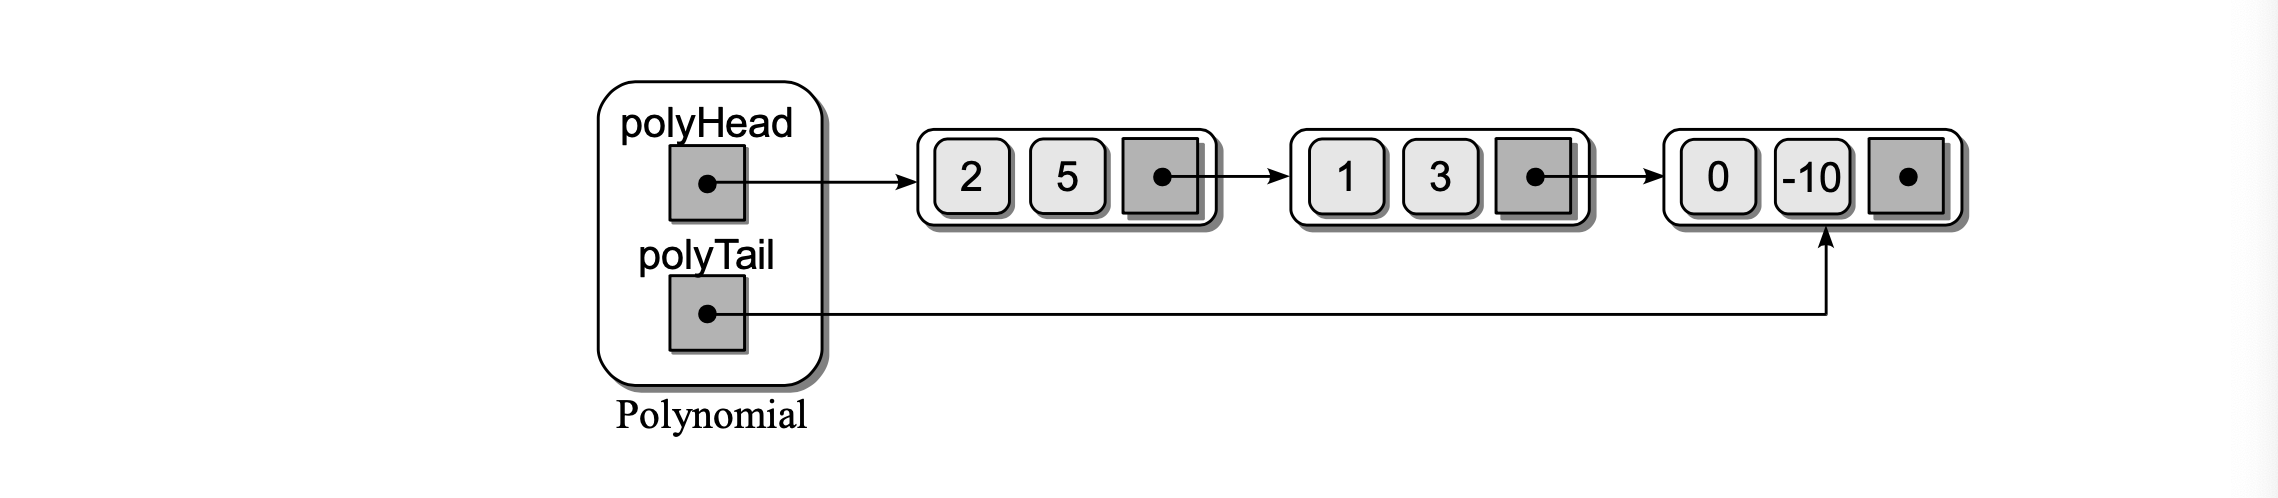
* **Deciding whether our implementation can benefir from the use of a tial pointer or if a head pointer alone will suffice.**
    * **A rule of thumb in making this decision is whether we will be appending nodes to the list or simply inserting them in their proper position.**
    * **If you need to append nodes to a linked list, you should use a tail pointer.**

In [17]:
# Implementation of the Polynomila ADT using a sorted linked list
class Polynomial:
    # Create a new polynomial object
    def __init__(self, degree = None, Coefficient = None):
        if degree is None:
            self._polyHead = None
        else:
            self._polyHead = _PolyTermNode(degree, coefficient)
        self._PolyTail = self._PolyHead
        
    # Return the degree of the polynomial
    def degree(self):
        if self._polyHead is None:
            return -1
        else:
            return self._polyHead.degree
    
    # Return the coefficient for the term of the given degree
    def __getitem__(self, degree):
        assert self.degree() >= 0,"Operation not permitted on an empty polynomial"
        curNode = self._polyHead
        while curNode is not None and curNode.degree >= degree:
            curNode = curNode.next
        
        if curNode is None or curNode.degree != degree:
            return 0.0
        else:
            return curNode.degree
        
    # Evaluate the polynomial at the given scalar value
    def evaluate(self, scalar):
        assert self.degree() >= 0,"Only non-empty polynomials can be evaluated"
        result = 0.0
        curNode = self.polyHead
        while curNode is not None:
            result += curNode.coefficient * (scalar ** curNode.degree)
            curNode = curNode.next
        return result
    
    # Helper method for appending terms to the polynomial
    def _appendTerm(self, degree, coefficient):
        if coefficient != 0.0:
            newTerm = _PolyTermNode(degree, coefficient)
            if self._polyHead is None:
                self._polyHead = newTerm
            else:
                self._polyTail.next = newTerm
            self._polyTail = newTerm
    
# Class for creating polynomial term nodes used with the linked list
class _PolyTermNode(object):
    def __init__(self, degree, coefficient):
        self.degree = degree
        self.coefficient = coefficient
        self.next = None

### Basic Operations
* **Polynomial ADT calss for two constructor: one for creating an empty polynomial and the other that can be used to create a polynomial initialized with a single term supplied as an argument.**
    * **These references are either initialized to $None$ or set to point to the first node in the list depending on how the constructor was called.**
* **The $degree( )$ method returns either the degree of the largest term that is stored in the first node or $-1$ if the polynomial is not defined.**
* **The get operation returns the coefficient corresponding to a specific term of the polynomial identified by degree.**
    * **A linear search of the linked list is required to find the corresponding term. Since the nodes are sorted by degree, we can terminate the search early if we encounter a node whose degree is smaller than target.**
    * **If there is no non-zero term with the given degree, then $curNode$ will either be $None$ or pointing to a list node whose degree is smaller than the target. In this case, we must return a value of $0$ since by definition a zero-term has a coefficient of 0. Otherwusem we simplyt return the coefficient of the corresponding term pointed to by $curNode$.**
* **The $evaluate( )$ method is easily implemented as a list traversal in which a sum is accumulated, term by term. The result is a $O(n)$ time operation, where $n$ is the degree of the polynomial.**

### Appending Terms
* **The $\_appendTerm( ) $ helper method accepts the degree and coefficient of a polynomial term, creates a new node to store the term, and appends the node to the end of the list.**

### Polynomial Addition
* **The new polynomial is created by ierating over the two original polynomials, term by term, from the largest degree amomh the two polynomials down to degree 0.**
    * **The element access method is used to extract the coefficients of corresponding terms from each polynomialm which are then added, resulting in a term for the new polynomial.**
    * **Since we iterate over the polynomials in decreasing degree order, we can simply append the new term to the end of the linked list storing the new polynomial.**
    * **The element access method, which is used to obtain the coefficients, requires $O(n)$ time.**
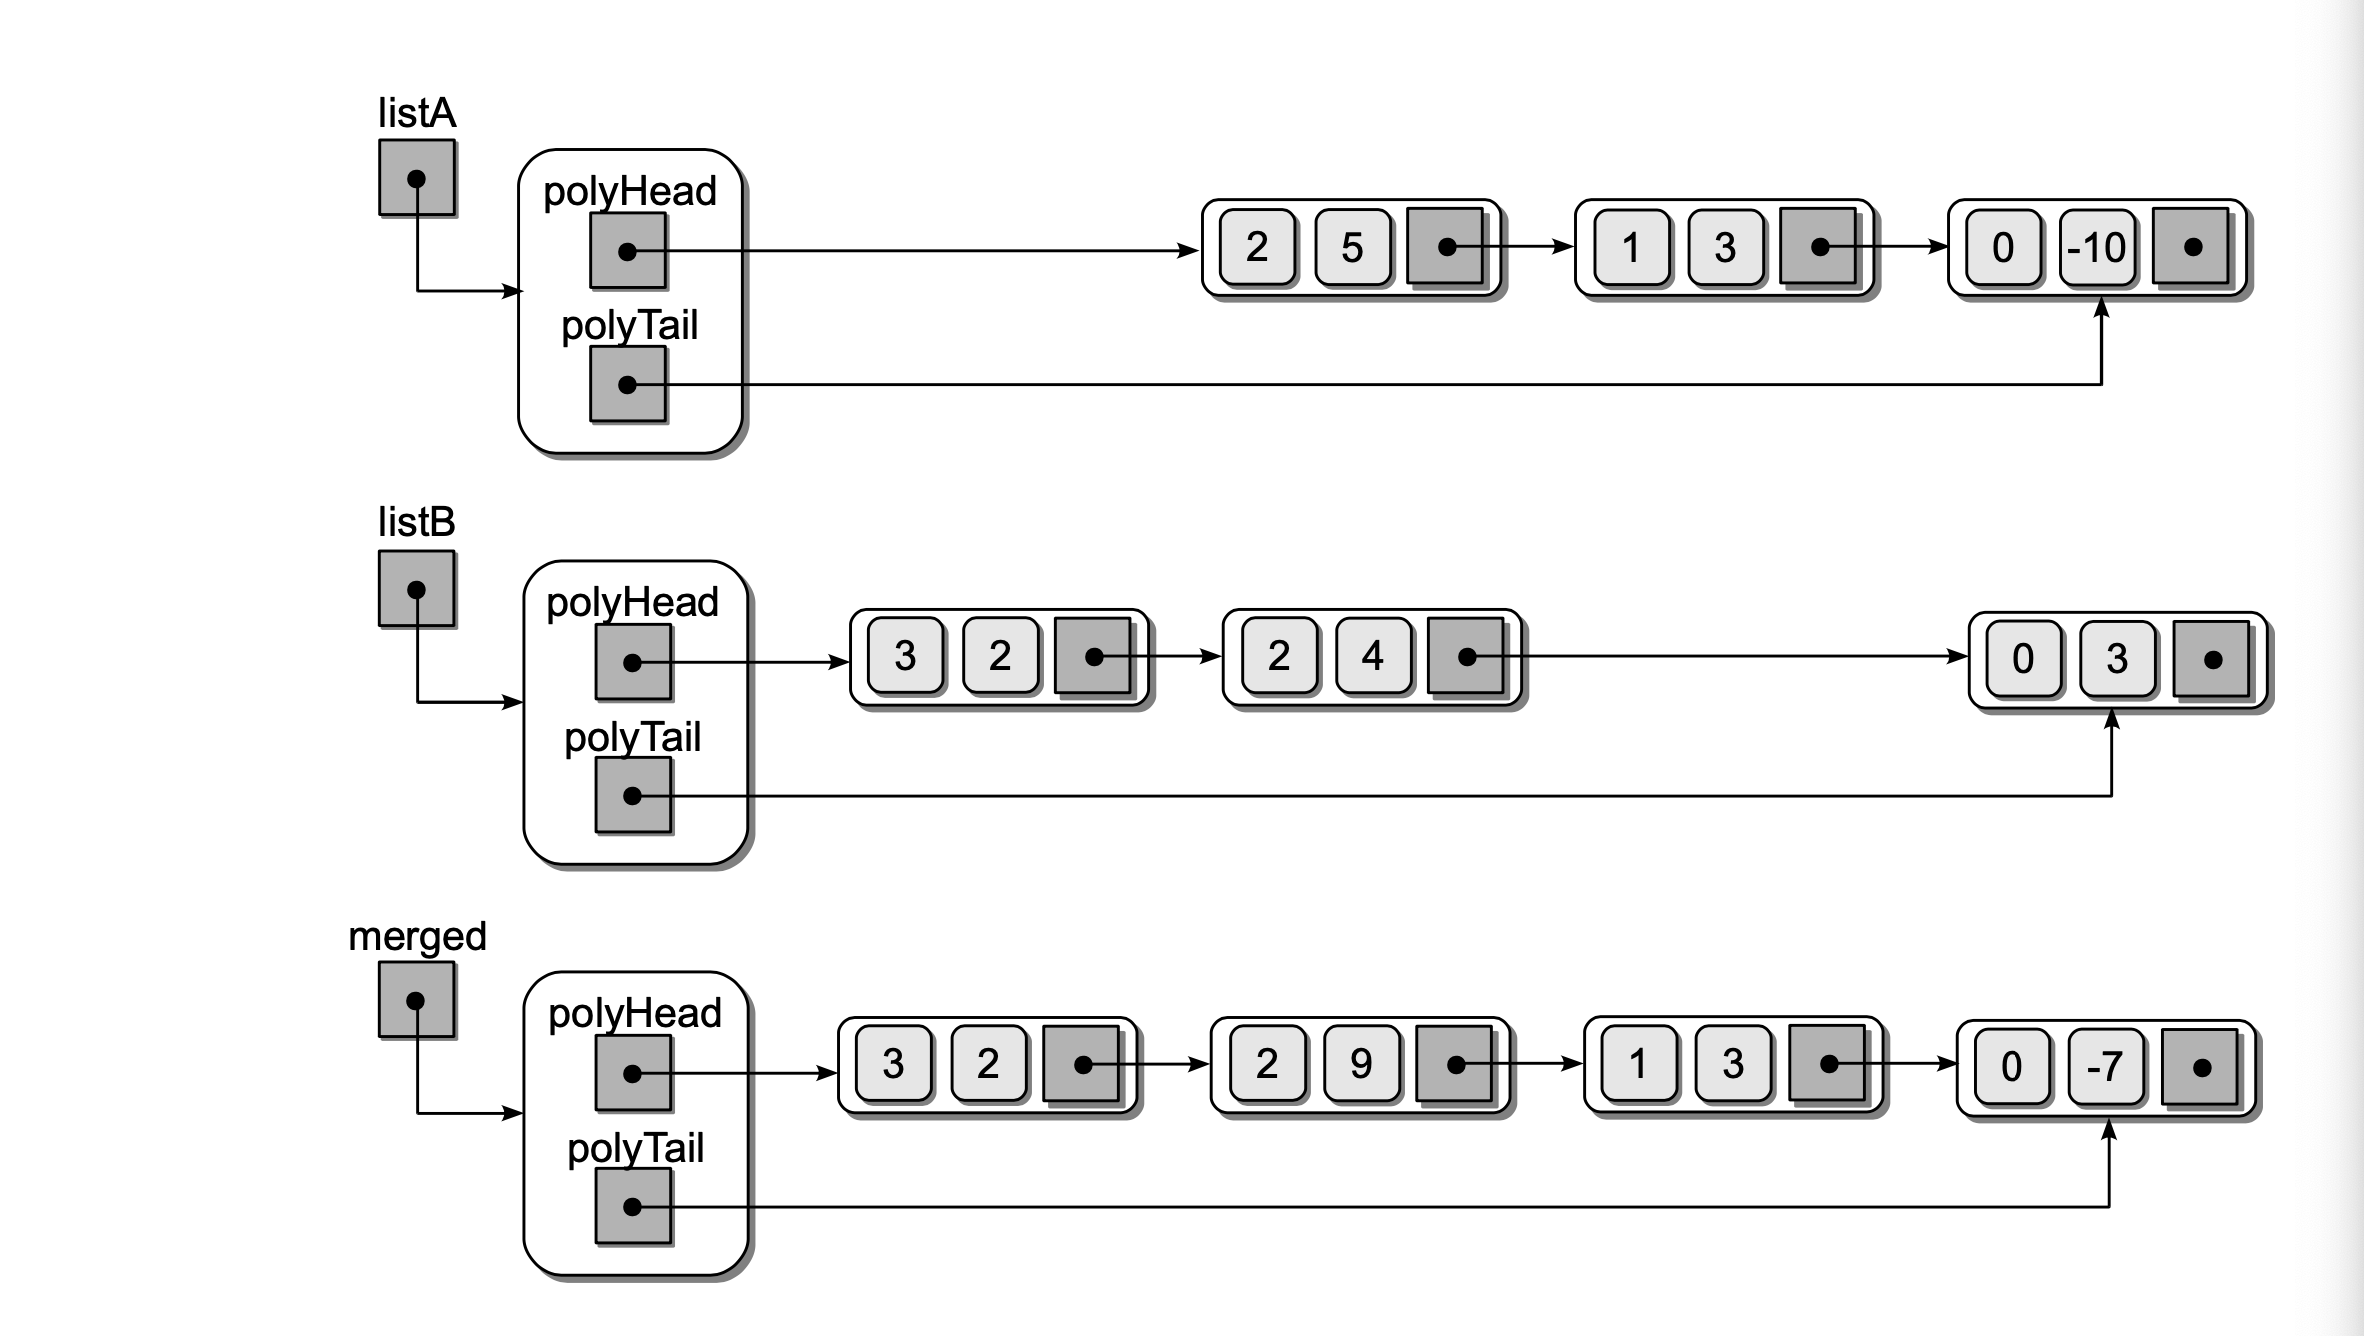

In [19]:
class Polynomial:
    def simple_add(self, rhsPoly):
        newPoly = polynomial()
        if self.degree() > rhsPoly.degree():
            maxDegree = self.degree()
        else: 
            maxDegree = rhsPoly.degree()
            
        i = maxDegree
        while i >= 0:
            value = self[i] + rhsPoly[i]
            self._appendTerm(i, value)
            i += 1
            
        return newPoly

* **Merging two sorted linked list requires several modifications. First, we must use temporary external references to point to the individual nodes of the two original polynomias.**
* **These references will be moved along the two linked lists as the terms are processed and merged into the new list.**
* **Next, we must utilize the $\_appendTerm( )$ helper method to append new nodes to the resulting merged list.**

In [20]:
class PolynomialL:
    def __add__(self, rhsPoly):
        assert self.degree() >= 0 and rhsPoly.degree() >= 0, "Addition only allowed on non-empty polynomials"
        
        newPoly = polynomial()
        nodeA = self._termList
        nodeB = rhsPoly._termList
        
        # Add corresponding terms until one list is empty
        while nodeA is not None and nodeB is not None:
            if nodeA.degree > nodeB.degree:
                degree = nodeA.degree
                value = nodeA.coefficient
                nodeA = nodeA.next
            elif listA.degree < listB.degree:
                degree = degreeB.degree
                value = nodeB.coefficient
                nodeB = nodeB.next
            else:
                degree = nodeA.degree
                value = nodeA.coefficient + nodeB.coefficient
                nodeA = nodeA.next
                nodeB = nodeB.next
            self._appendTerm(degree, value)
            
        # If self list contains more terms, append them
        while nodeA is not None:
            self._appendTerm(nodeA.degree, nodeA.coefficient)
            nodeA = nodeA.next
        
            # If rhs contains more terms append them
            while nodeB is not None:
                self_appendTerm(nodeB.degree, nodeB.coefficient)
                nodeB = nodeB.next
            
            return newPoly

#### Multiplication
* **Computing the product of two polynomials required multiplying the second polynomial by each term in the first. This generates a series of intermediate polynomials, which are then added to create the final product.**

In [22]:
class Polynomial:
    def multiply(self, rhsPoly):
        assert self.degree() >= 0 and rhsPoly.degree() >= 0, "Multiplication only allowed on non-empty polynomials"
        
        # Create a new polynomial by multiplying rhsPily by the first term
        node = self._polyHead
        newPoly = rhsPoly._termMultiply(node)
        
        # Iterate through the remaining terms of the poly computing the product of
        # the rhsPoly by each term
        node = node.next
        while node is not None:
            tempPoly = rhsPoly._termMultiply(node)
            newPoly = newPoly.add(tempPoly)
            node = node.next
        
        return newPoly
    
    # Helper method for creating a new polynomial from multiplying an 
    # existing polynomial by another term
    def _termMultiply(self, termNode):
        newPoly = Polynomial()
        
        # Iterate through the terms and compute the product of each term
        # and the term in the termNode
        curr = curr.next
        while curr is not None:
            # Compute the product of the term
            newDegree = curr.degree + termNode.degree
            newCoeff = curr.coefficient * termNode.coefficient
    
            # Append it to the new polynomial
            newPoly._appendTerm(newDegree, newCoeff)
        
            # Advance the current pointer
            curr = curr.next
        return newPoly